# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
print(dir(p12))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [5]:
p12.status_code

200

In [6]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

In [7]:
print(p12.content)

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [8]:
p12.headers

{'Date': 'Sat, 19 Sep 2020 18:48:38 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=ddda78a39ee2e981f4129c2b18bd67df01600541318; expires=Mon, 19-Oct-20 18:48:38 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"602fc-GlYCFIdxZIWBrkIb6fLdFzXsqWc"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '1', 'grace': '86400.000 none', 'ttl': '118.889', 'X-Instance': 'cache-front-prod-varnish-6f54cb8b98-4khw7', 'x-restarts': '0', 'X-Cache': 'HIT (10)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '05494b764600000f464bb3d200000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/be

In [9]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [10]:
p12.request.method

'GET'

In [11]:
p12.request.url

'https://www.pagina12.com.ar/'

In [12]:
from bs4 import BeautifulSoup

In [13]:
s = BeautifulSoup(p12.text, 'lxml')

In [14]:
type(s)

bs4.BeautifulSoup

In [15]:
print(dir(s))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_check_markup_is_url', '_decode_markup', '_feed', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_linkage_fixer', '_most_recent_element', '_namespaces', '_popToTag', '_should_pretty_print', 'append', 'attrs', 'builder', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contains_replacement_characters', 'co

In [16]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [17]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/recordatorios">Recordatorios</a></li>]

In [18]:
seccion = secciones[0]

In [19]:
seccion.a.get_text()

'El país'

In [20]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [21]:
links_secciones = [seccion.a.get('href') for seccion in secciones]

In [22]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/recordatorios']

In [23]:
sec = requests.get(links_secciones[0])

In [24]:
sec.status_code

200

In [25]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [26]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [27]:
featured_article = s_seccion.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101">Tenía 43 años y se pudo reencontrar con su padre en 2010</a></span><h2><a href="https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101">Murió Francisco Madariaga Quintela, el nieto recuperado 101</a></h2><a href="https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101"><p class="subhead">Estaba entre los pocos que pudieron reencontrarse con un progenitor. Su infancia "fue tortuosa, sufrió violencia física y psicológica por parte de su apropiador", dijeron las Abuelas. "Construyó víncu...</p></a><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span></div></div>

In [28]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101'

In [29]:
article_list = s_seccion.find('ul', attrs={'class':'article-list'})

In [34]:
print(article_list)

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h2><a href="https://www.pagina12.com.ar/293209-enciendan-la-betosenal">¡Enciendan la Betoseñal!</a></h2><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span><i>|</i><span class="tag-1">Por <a href="https://www.pagina12.com.ar/autores/1048-marcelo-rudaeff-rudy">Marcelo Rudaeff (Rudy)</a></span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/293209-enciendan-la-betosenal"><div class="overlay img-multimedia-overlay"></div><img class="overlay img-multimedia-overlay-icon" src="https://www.pagina12.com.ar/assets/medi

In [35]:
def obtener_notas(soup):
    '''
    Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []
    
    # Obtengo el artículo promocionado
    featured_article = soup.find('div', attrs={'class':'featured-article__container'})
    if featured_article:
        lista_notas.append(featured_article.a.get('href'))
    
    # Obtengo el listado de artículos
    article_list = soup.find('ul', attrs={'class':'article-list'})
    for article in article_list.find_all('li'):
        if article.a:
            lista_notas.append(article.a.get('href'))
    
    return lista_notas

In [36]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101',
 'https://www.pagina12.com.ar/293209-enciendan-la-betosenal',
 'https://www.pagina12.com.ar/293206-alberto-fernandez-ahora-parece-que-nadie-es-macrista-pido-un',
 'https://www.pagina12.com.ar/293201-santiago-cafiero-duhalde-esta-mal-lo-tiene-que-cuidar-la-fam',
 'https://www.pagina12.com.ar/293197-vacuna-contra-el-coronavirus-el-gobierno-definio-pautas-para',
 'https://www.pagina12.com.ar/293108-el-estado-sera-querellante-en-la-causa-mas-grave-contra-macr',
 'https://www.pagina12.com.ar/293121-coronavirus-en-argentina-197-nuevas-muertes-y-11-945-nuevos-',
 'https://www.pagina12.com.ar/293145-las-6-provincias-con-mas-contagios-en-los-ultimos-15-dias',
 'https://www.pagina12.com.ar/293146-continua-la-puja-por-las-clases-en-la-ciudad-de-buenos-aires',
 'https://www.pagina12.com.ar/293149-los-jueces-bruglia-bertuzzi-y-castelli-solo-coleccionan-mala',
 'https://www.pagina12.com.ar/293152-jorge-

## Manejo de errores. 
Código de error != 200

In [37]:
r = requests.get(url)

In [38]:
if r.status_code == 200:
    print('Procesamos la respuesta')
else:
    print('informamos el error')

Procesamos la respuesta


In [39]:
url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [40]:
try:
    requests.get(url_mala)
except Exception as e:
    print('error en la request')
    print(e)

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001BF64912F70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [41]:
featured_article.b.get('href')

AttributeError: 'NoneType' object has no attribute 'get'

In [42]:
try:
    featured_article.b.get('href')
except:
    pass
print('continua el codigo')

continua el codigo


In [47]:
url_nota = lista_notas[0]
url_nota

'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101'

In [49]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraer la fecha
        fecha = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
        print(fecha)
        # Extraer la volanta
        volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
        print(volanta.get_text())
except Exception as e:
    print('Error:')
    print(e)
    print('\n')

Murió Francisco Madariaga Quintela, el nieto recuperado 101
2020-09-19
Tenía 43 años y se pudo reencontrar con su padre en 2010


In [50]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})

In [51]:
imagenes = media.find_all('img')
imagenes

[<img alt="Francisco con su padre, poco después de haber recuperado su identidad. " class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/106276-imagengaleria-fran-abel-796.jpg?itok=nC4Fhc7X" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Francisco con su padre, poco después de haber recuperado su identidad. " class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106276-imagengaleria-fran-abel-796.jpg?itok=3PKzbRZx" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Francisco con su padre, poco después de haber recuperado su identidad. " class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106276-imagengaleria-fran-abel-796.jpg?itok=3PKzbRZx" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="

In [52]:
if len(imagenes) == 0:
    print('no se encontraron imágenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106276-imagengaleria-fran-abel-796.jpg?itok=3PKzbRZx


In [53]:
img_req = requests.get(img_src)

In [54]:
img_req.status_code

200

In [55]:
from IPython.display import Image

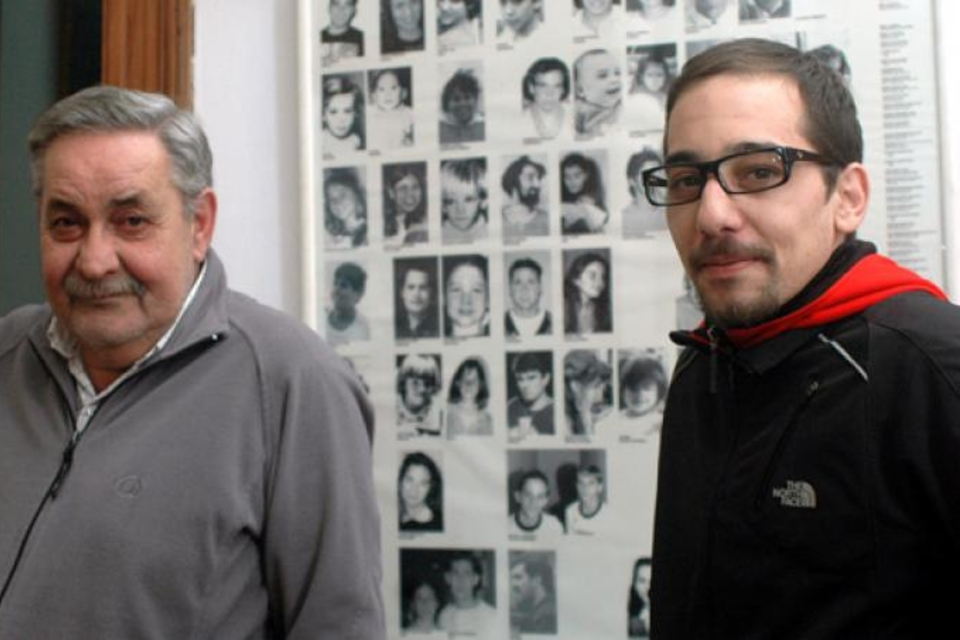

In [56]:
Image(img_req.content)